In [1]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_rows', 500)


In [2]:
SCORE = 80
YEAR = 2020
CLUSTER = 1
PRED_PATH = f"/data/tmp/arogya/results/aoimodal-{YEAR}-20230301-0106/predictions"
# "/data/tmp/arogya/results/aoimodal-2020-20230301-0106/"

In [3]:
FOLDERS = os.listdir(PRED_PATH)


In [4]:
# Get predicted values for parts
print("Accumulating predictions..\n")
incomplete = []
results = []
for folder in FOLDERS:
    PATH = f"{PRED_PATH}/{folder}/kmeans_3_K_{CLUSTER}_dist_score_gte_{SCORE}.csv"
    if os.path.exists(PATH):
        df = pd.read_csv(f"{PRED_PATH}/{folder}/kmeans_3_K_{CLUSTER}_dist_score_gte_{SCORE}.csv")
        if df.empty:
#             print("\tDataframe is empty:", folder)
            results.append({"district_partition": folder, "district_id": folder.split("_")[0], "clustering_ha": 0})
        else:
            dist_result = df['clustering_ha'][0]
            dist_result = {"district_partition": folder, "district_id": folder.split("_")[0], "clustering_ha": dist_result}
#             dist_result = pd.DataFrame(dist_result)
            results.append(dist_result)
    else:
        incomplete.append(folder)
#         print("\tFile does not exist:", folder)
        print(f"cp /data/tmp/arogya/inputs/grids_50km/{folder}.gpkg /data/")
        
results = pd.DataFrame(results)
incomplete = list(np.unique([int(f.split("_")[0]) for f in incomplete]))
results = results[~results['district_id'].astype(int).isin(incomplete)]
results = results.groupby('district_id').sum()['clustering_ha'].reset_index()
results['district_id'] = results['district_id'].astype(int)

Accumulating predictions..

1115_0
1123_0
1904_2
1102_0
1904_1
1302_0
1124_1
1124_2
1103_0
1702_2
1112_1
1124_0
1113_0
2101_1
1103_1
1907_0
1118_0
1113_1
1705_1
2004_1
2103_2
1804_0
2004_0
1906_2
2014_6
1906_0
1905_2
1904_5
2101_4
2006_1
1125_0
2012_1
1112_0
1004_0
1907_1
2203_4
2203_0
2109_2
2205_0
2203_8
1126_0
2203_10
2203_14
1111_0
2105_2
1307_0
2404_0
2313_0
2408_3
2309_0
2311_2
2402_1
2403_0
2311_4
2408_0
2408_1
2407_0
2408_4
2313_1
2402_2
2310_2
2311_0
2413_1
2603_3
2313_10
2602_3
2310_4
2313_4
2412_1
2203_1
2203_6
2203_7
2203_9
2307_0
2310_0
2205_3
2313_6
2603_1
2310_1
2313_3
2601_2
2415_0
2311_7
2601_0
2203_5
2203_2
2106_2
2310_3
2313_2
2507_0
2311_5
2601_1
2413_0
2707_1
2310_5
2308_0
2313_9
2710_4
2604_1
2205_4
2311_1
2709_0
2313_5
2707_2
2406_2
2710_2
2406_0
2707_3
2705_1
2703_1
2405_2
2706_4
2408_2
2605_2
2305_0
2402_0
2702_1
3402_1
3404_2
3402_5
3402_3
3103_3
3102_0
3402_2
605_0
3409_1
3409_3
3402_0
3407_1
3103_0
3408_1
3404_1
605_2
902_0
901_0


In [5]:
incomplete

[605,
 901,
 902,
 1004,
 1102,
 1103,
 1111,
 1112,
 1113,
 1115,
 1118,
 1123,
 1124,
 1125,
 1126,
 1302,
 1307,
 1702,
 1705,
 1804,
 1904,
 1905,
 1906,
 1907,
 2004,
 2006,
 2012,
 2014,
 2101,
 2103,
 2105,
 2106,
 2109,
 2203,
 2205,
 2305,
 2307,
 2308,
 2309,
 2310,
 2311,
 2313,
 2402,
 2403,
 2404,
 2405,
 2406,
 2407,
 2408,
 2412,
 2413,
 2415,
 2507,
 2601,
 2602,
 2603,
 2604,
 2605,
 2702,
 2703,
 2705,
 2706,
 2707,
 2709,
 2710,
 3102,
 3103,
 3402,
 3404,
 3407,
 3408,
 3409]

In [6]:
unodc = pd.read_csv("~/projects/afg-clustering/data/inputs/poppy_1994-2020.csv")[['distid', f'X{YEAR}']]
unodc.columns = ["district_id", "actual_ha"]
unodc['district_id'] = unodc['district_id'].astype(int)
# display(unodc.sort_values("district_id"))

In [7]:
joined = pd.merge(unodc, results).dropna()
joined['quintile'] = pd.qcut(joined['actual_ha'], 4, labels=False)
joined


district_id  actual_ha  clustering_ha  quintile
0           112      284.0           0.00         2
1           802       61.0       41044.40         1
2           803      110.0           0.00         2
3           804      173.0           0.00         2
4           805     1429.0           0.00         3
5           806       14.0           0.00         1
6           808        2.0           0.00         0
7           809      248.0       39977.58         2
8           813       17.0       16074.92         1
9           814       13.0       21419.69         0
10          815       18.0       55373.51         1
11          816       21.0       59848.53         1
12          817        1.0       11443.02         0
13          820       99.0       19014.75         2
15          903      171.0           0.00         2
16          904       15.0           0.00         1
17          905      484.0           0.00         2
18         1001       36.0        9420.22         1
19         1002       12.0       14075.87         0
20         1003       25.0       16259.53         1
22         1006        4.0       33796.68         0
23         1007       91.0       33063.45         1
24         1009        1.0           0.00         0
25         1010        5.0       45097.72         0
26         1011        1.0       19141.60         0
27         1013        5.0       26426.82         0
28         1014       41.0       32159.85         1
29         1015      374.0       20392.21         2
30         1116     1422.0           0.00         3
31         1312      223.0           0.00         2
32         1315       30.0           0.00         1
34         1606     2030.0           0.00         3
35         1607     1453.0           0.00         3
36         1608     2354.0           0.00         3
37         1609       90.0           0.00         1
38         1612       19.0           0.00         1
39         1701      156.0           0.00         2
40         1703      242.0           0.00         2
41         1704        3.0           0.00         0
42         1706       10.0           0.00         0
43         1707        4.0           0.00         0
44         1708       30.0           0.00         1
45         1710       12.0           0.00         0
46         1711      663.0           0.00         2
47         1802      671.0           0.00         3
48         1803     1625.0           0.00         3
49         1805        4.0           0.00         0
50         1807        2.0           0.00         0
51         1808      108.0           0.00         2
52         1809      354.0           0.00         2
53         1813       69.0           0.00         1
54         1901       26.0           0.00         1
55         1902      642.0           0.00         2
56         1903     6365.0           0.00         3
57         2102      723.0      181998.55         3
59         2110        1.0      305441.30         0
60         2111     1810.0       17190.33         3
61         2301     1583.0       96494.95         3
62         2302    17365.0      119832.44         3
63         2303    10831.0      166487.23         3
64         2304    15624.0      127600.34         3
65         2306    15798.0      293278.61         3
66         2312     4386.0       47594.64         3
67         2401        5.0           0.00         0
68         2411       30.0      242514.17         1
69         2416     3166.0           0.00         3
70         2505      155.0           0.00         2
71         3101      572.0           0.00         2
72         3106     2004.0           0.00         3
73         3401        4.0           0.00         0

# Correlations

In [8]:
col1, col2 = "actual_ha", "clustering_ha"
joined.groupby('quintile')[['clustering_ha', 'actual_ha']].corr(method='spearman')
# print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

clustering_ha  actual_ha
quintile                                        
0        clustering_ha       1.000000   0.029286
         actual_ha           0.029286   1.000000
1        clustering_ha       1.000000   0.099875
         actual_ha           0.099875   1.000000
2        clustering_ha       1.000000  -0.060802
         actual_ha          -0.060802   1.000000
3        clustering_ha       1.000000   0.424856
         actual_ha           0.424856   1.000000

In [9]:
joined[joined['quintile']==3]

district_id  actual_ha  clustering_ha  quintile
4           805     1429.0           0.00         3
30         1116     1422.0           0.00         3
34         1606     2030.0           0.00         3
35         1607     1453.0           0.00         3
36         1608     2354.0           0.00         3
47         1802      671.0           0.00         3
48         1803     1625.0           0.00         3
56         1903     6365.0           0.00         3
57         2102      723.0      181998.55         3
60         2111     1810.0       17190.33         3
61         2301     1583.0       96494.95         3
62         2302    17365.0      119832.44         3
63         2303    10831.0      166487.23         3
64         2304    15624.0      127600.34         3
65         2306    15798.0      293278.61         3
66         2312     4386.0       47594.64         3
69         2416     3166.0           0.00         3
72         3106     2004.0           0.00         3

In [10]:
joined['lac'] = np.log(joined['actual_ha'])
joined['lpr'] = np.log(joined['clustering_ha'])


joined[joined['quintile']==3][['lac', 'lpr']].corr()

/home/arogya/.conda/envs/poppy-linux/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


lac       lpr
lac  1.000000  0.374648
lpr  0.374648  1.000000

In [11]:
# joined['sse']=np.sqrt((joined['actual_ha'] - joined['clustering_ha'])**2)

In [12]:
# joined

In [13]:
# joined['sse_quintile'] = pd.qcut(joined['sse'], 4, labels=False)

In [14]:
# col1, col2 = "actual_ha", "clustering_ha"
# joined.groupby('sse_quintile')[['clustering_ha', 'actual_ha']].corr()

In [15]:
# joined.sort_values('sse')

# Sample results

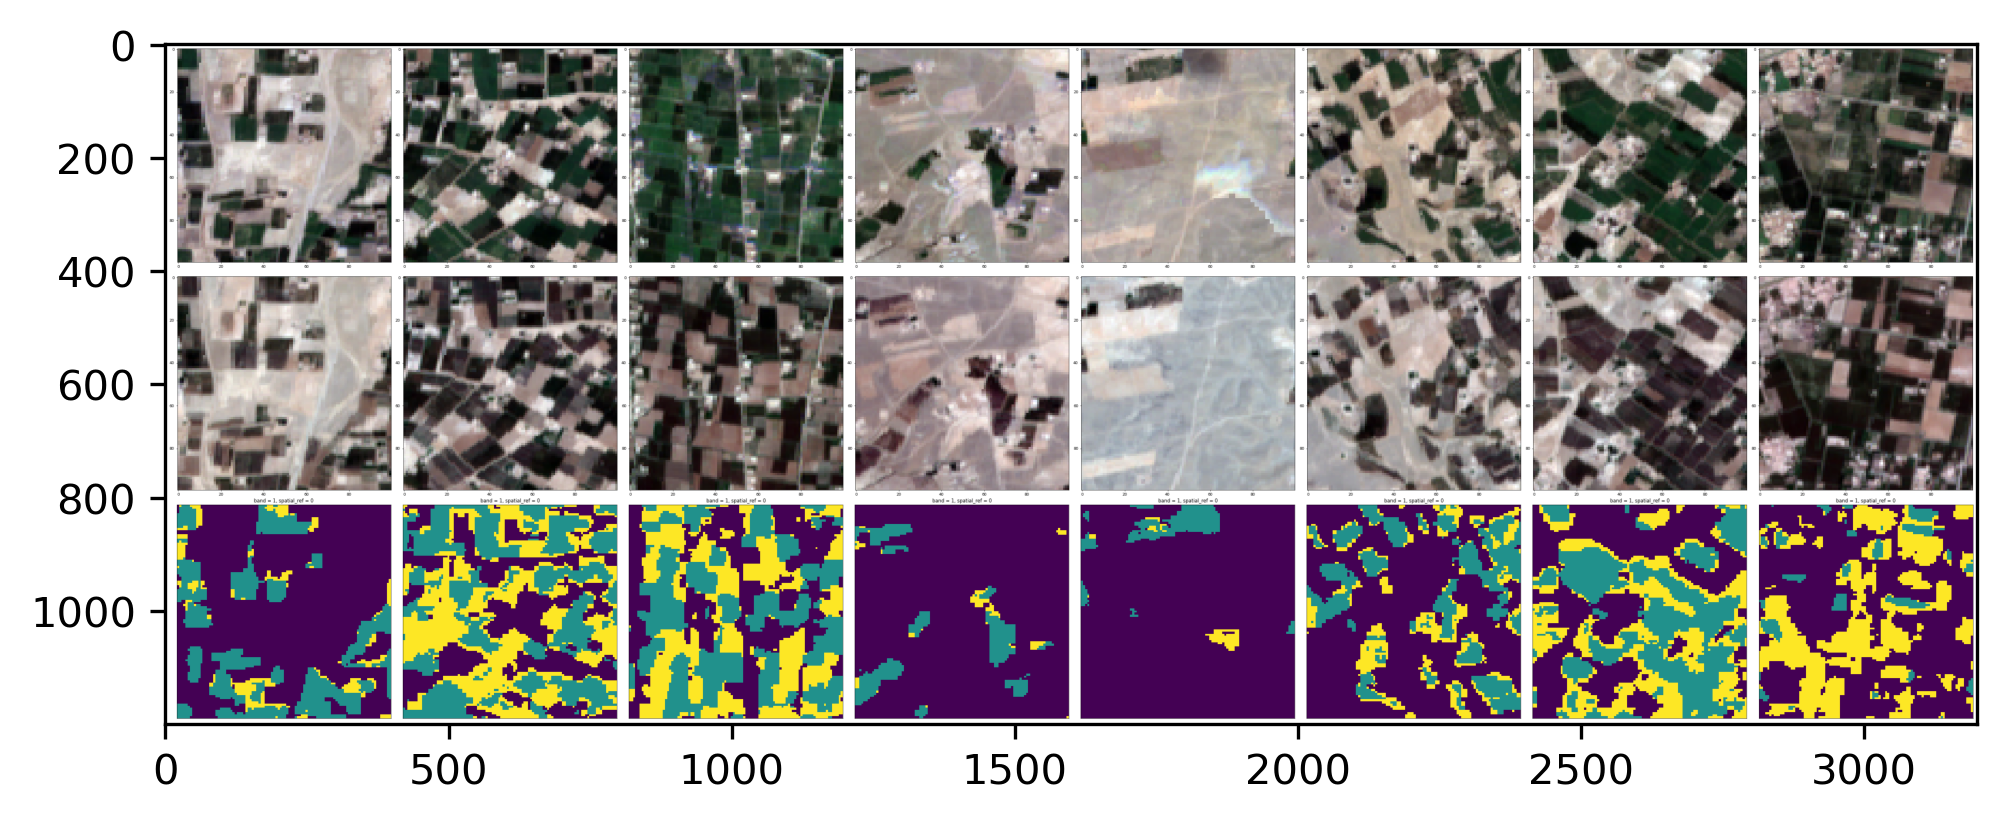

In [16]:
import matplotlib.pyplot as plt
img = plt.imread(f"/data/tmp/arogya/results/aoimodal{YEAR}_v2/predictions/2308_3/plot_predictions_kmeans_3.png")

fig, ax = plt.subplots(1,1,figsize=(10,3), dpi=300)
plt.imshow(img)

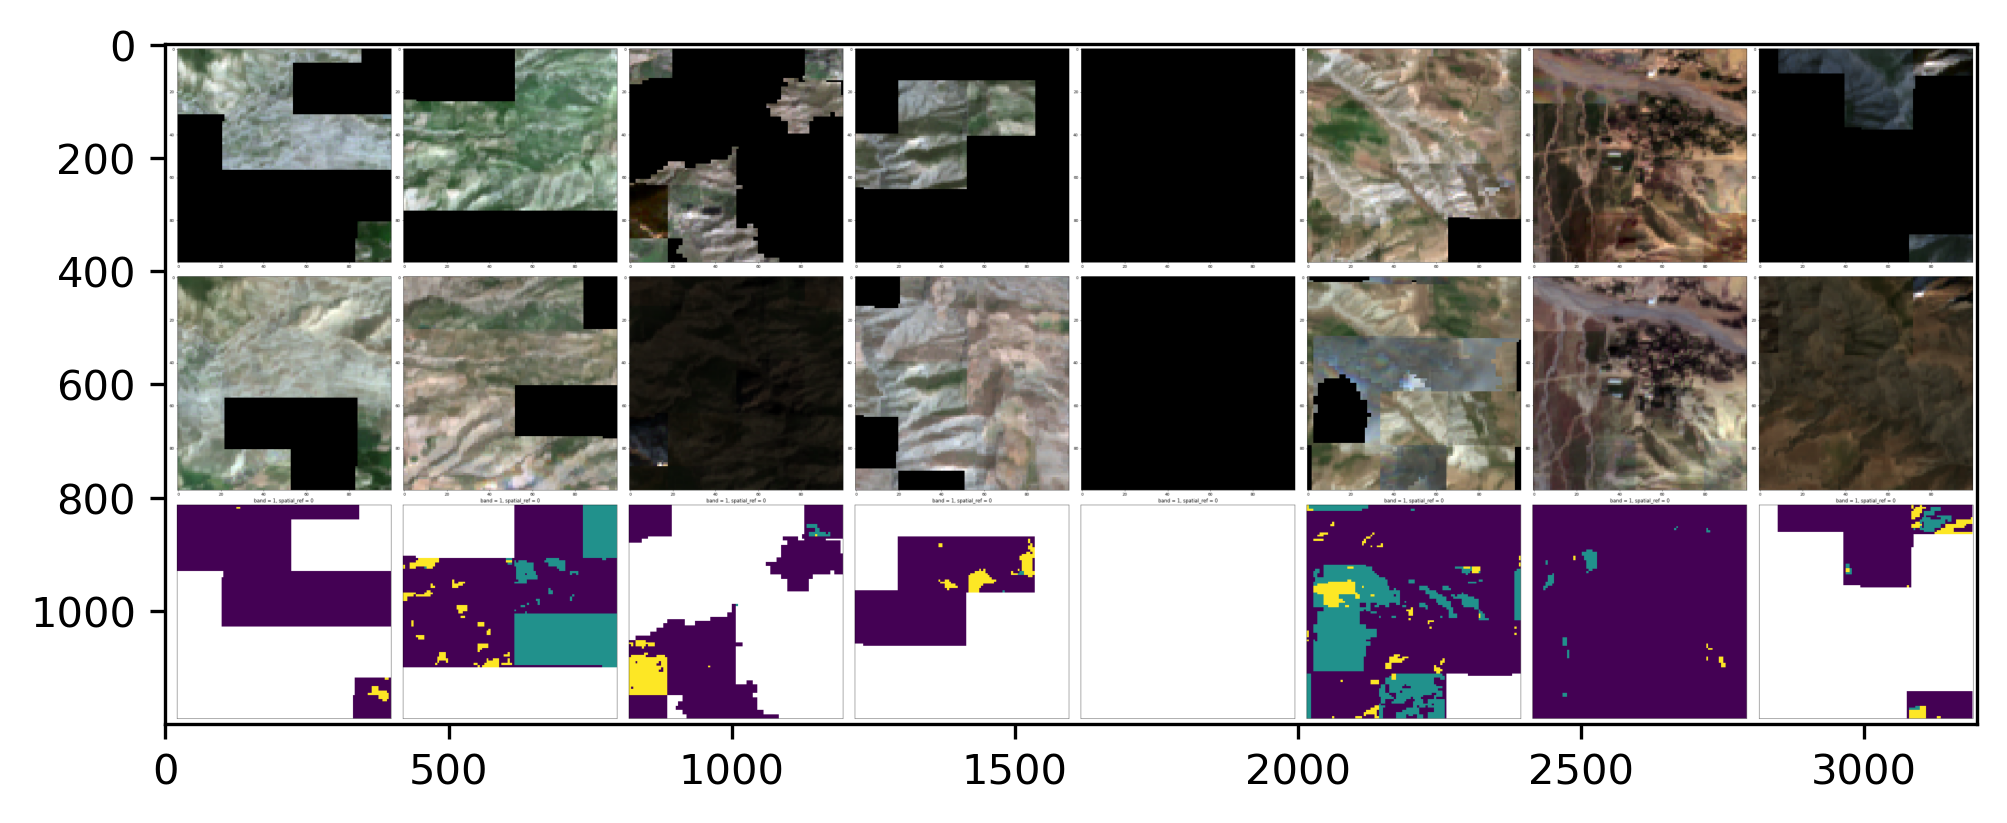

In [17]:
import matplotlib.pyplot as plt
img = plt.imread(f"/data/tmp/arogya/results/aoi_{YEAR}/predictions/1113_1/plot_predictions_kmeans_3.png")

fig, ax = plt.subplots(1,1,figsize=(10,3), dpi=300)
plt.imshow(img)

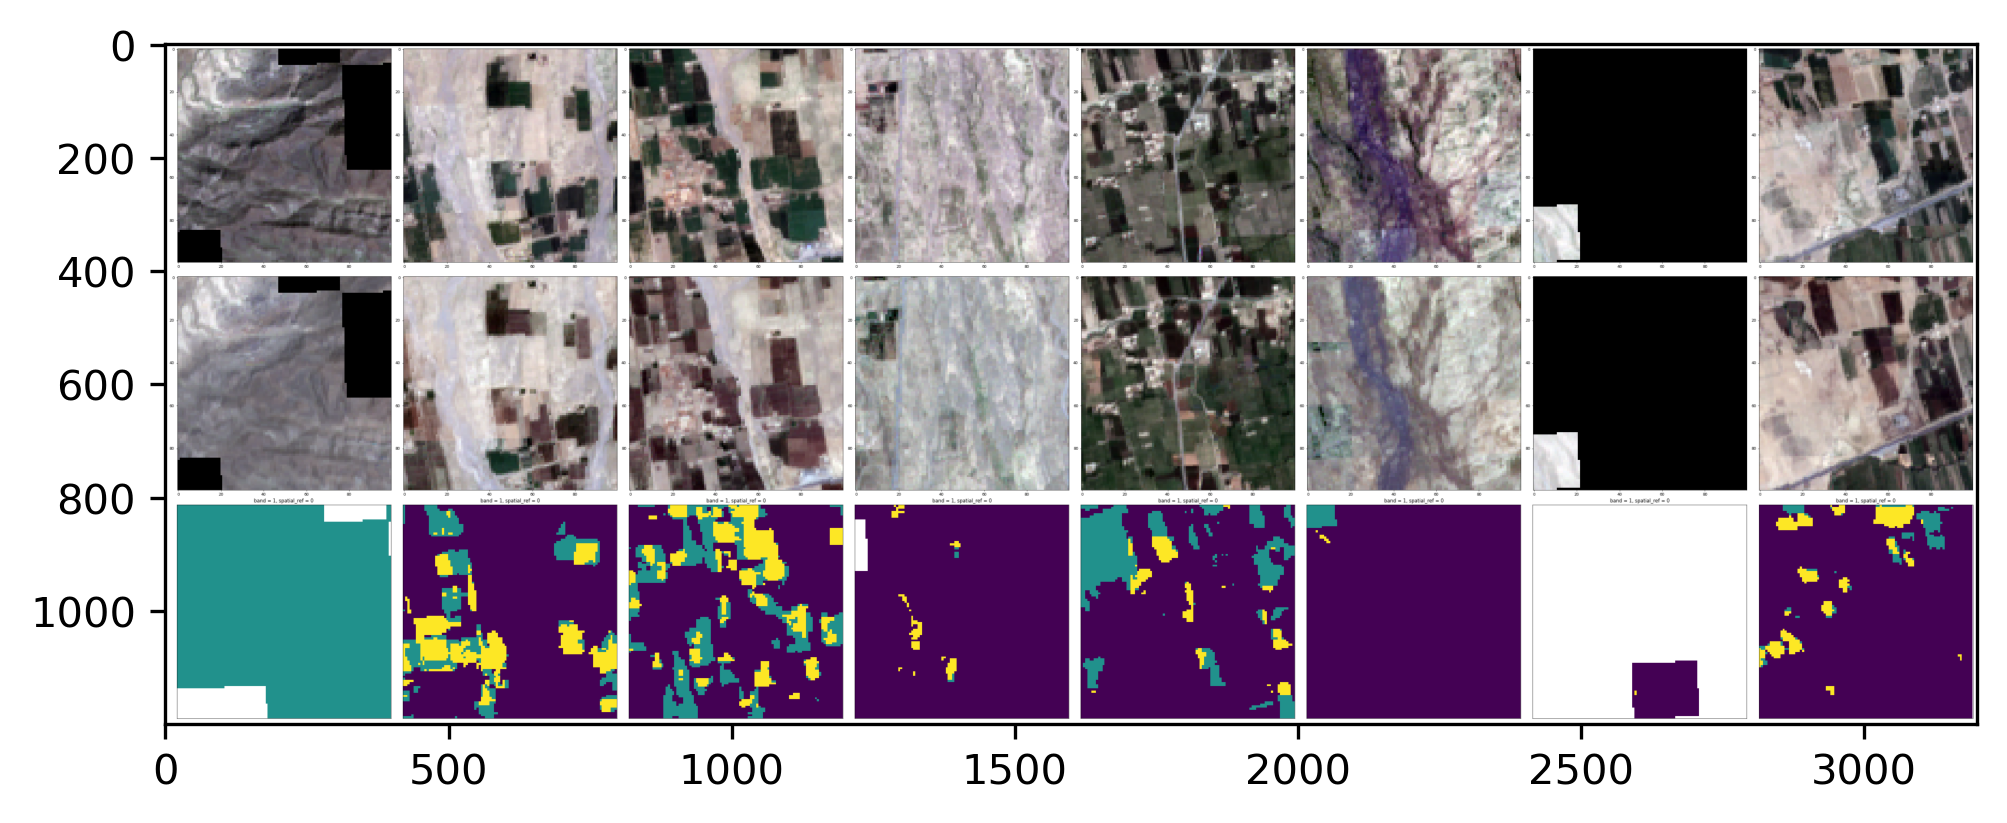

In [18]:
import matplotlib.pyplot as plt
img = plt.imread(f"/data/tmp/arogya/results/aoi_{YEAR}/predictions/2416_0/plot_predictions_kmeans_3.png")

fig, ax = plt.subplots(1,1,figsize=(10,3), dpi=300)
plt.imshow(img)

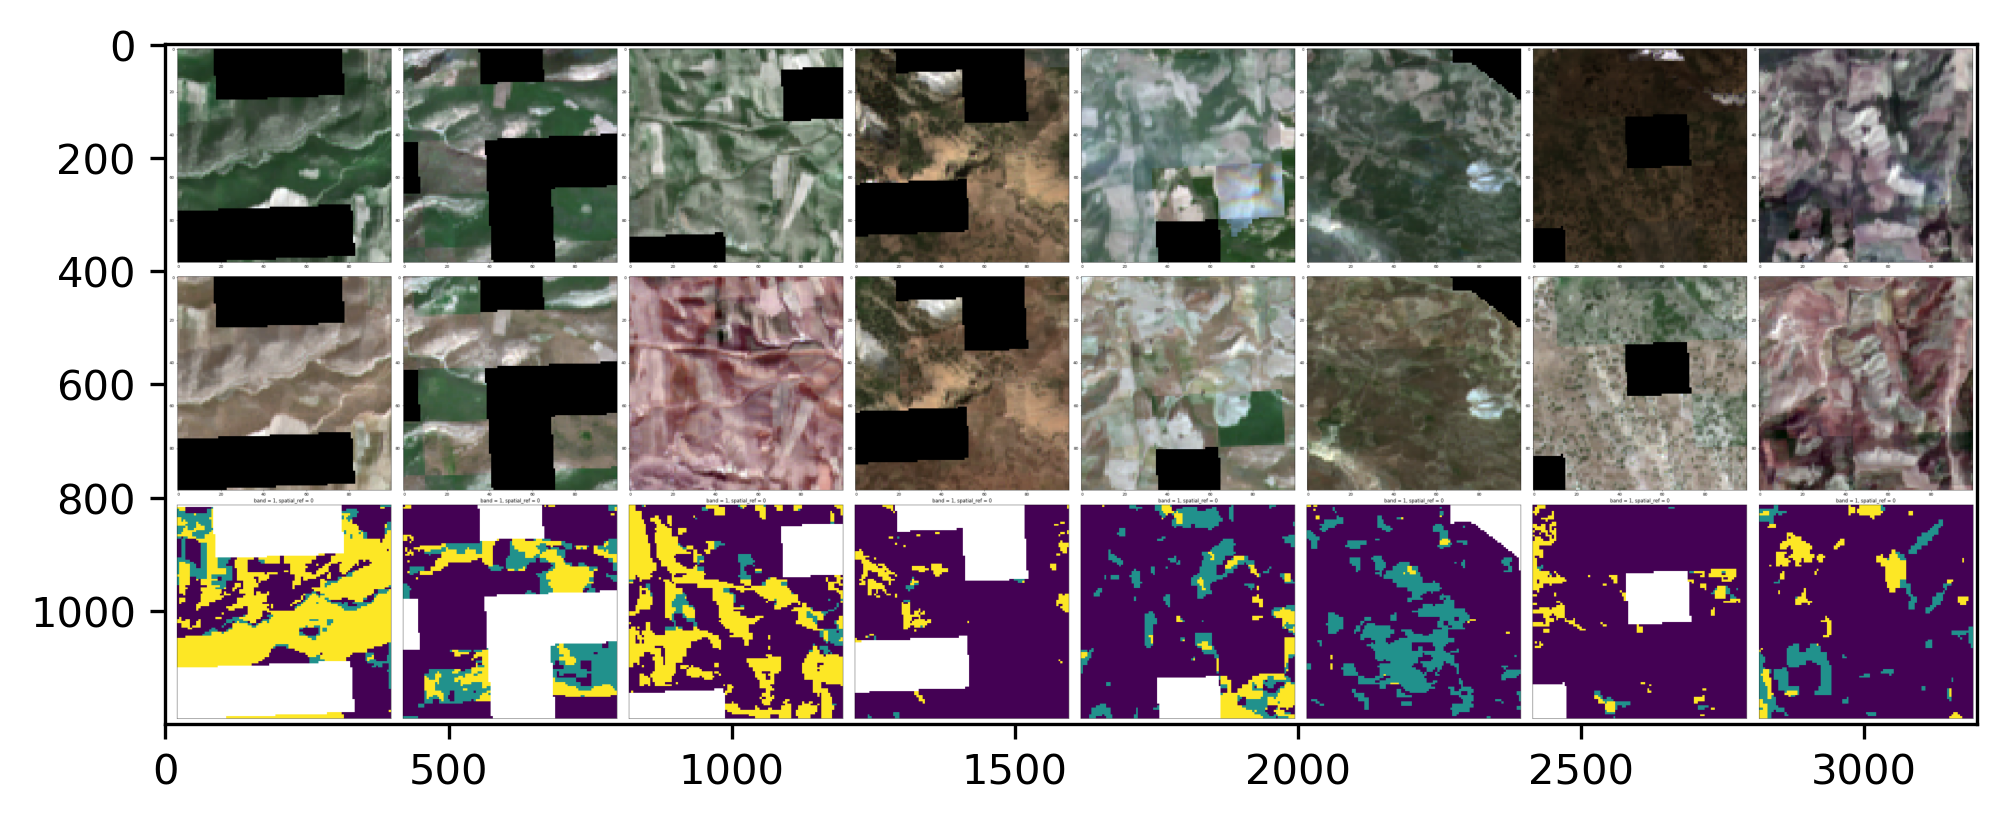

In [19]:
import matplotlib.pyplot as plt
img = plt.imread(f"/data/tmp/arogya/results/aoi_{YEAR}/predictions/1906_1/plot_predictions_kmeans_3.png")

fig, ax = plt.subplots(1,1,figsize=(10,3), dpi=300)
plt.imshow(img)

# Graphs

### Actual vs Predicted

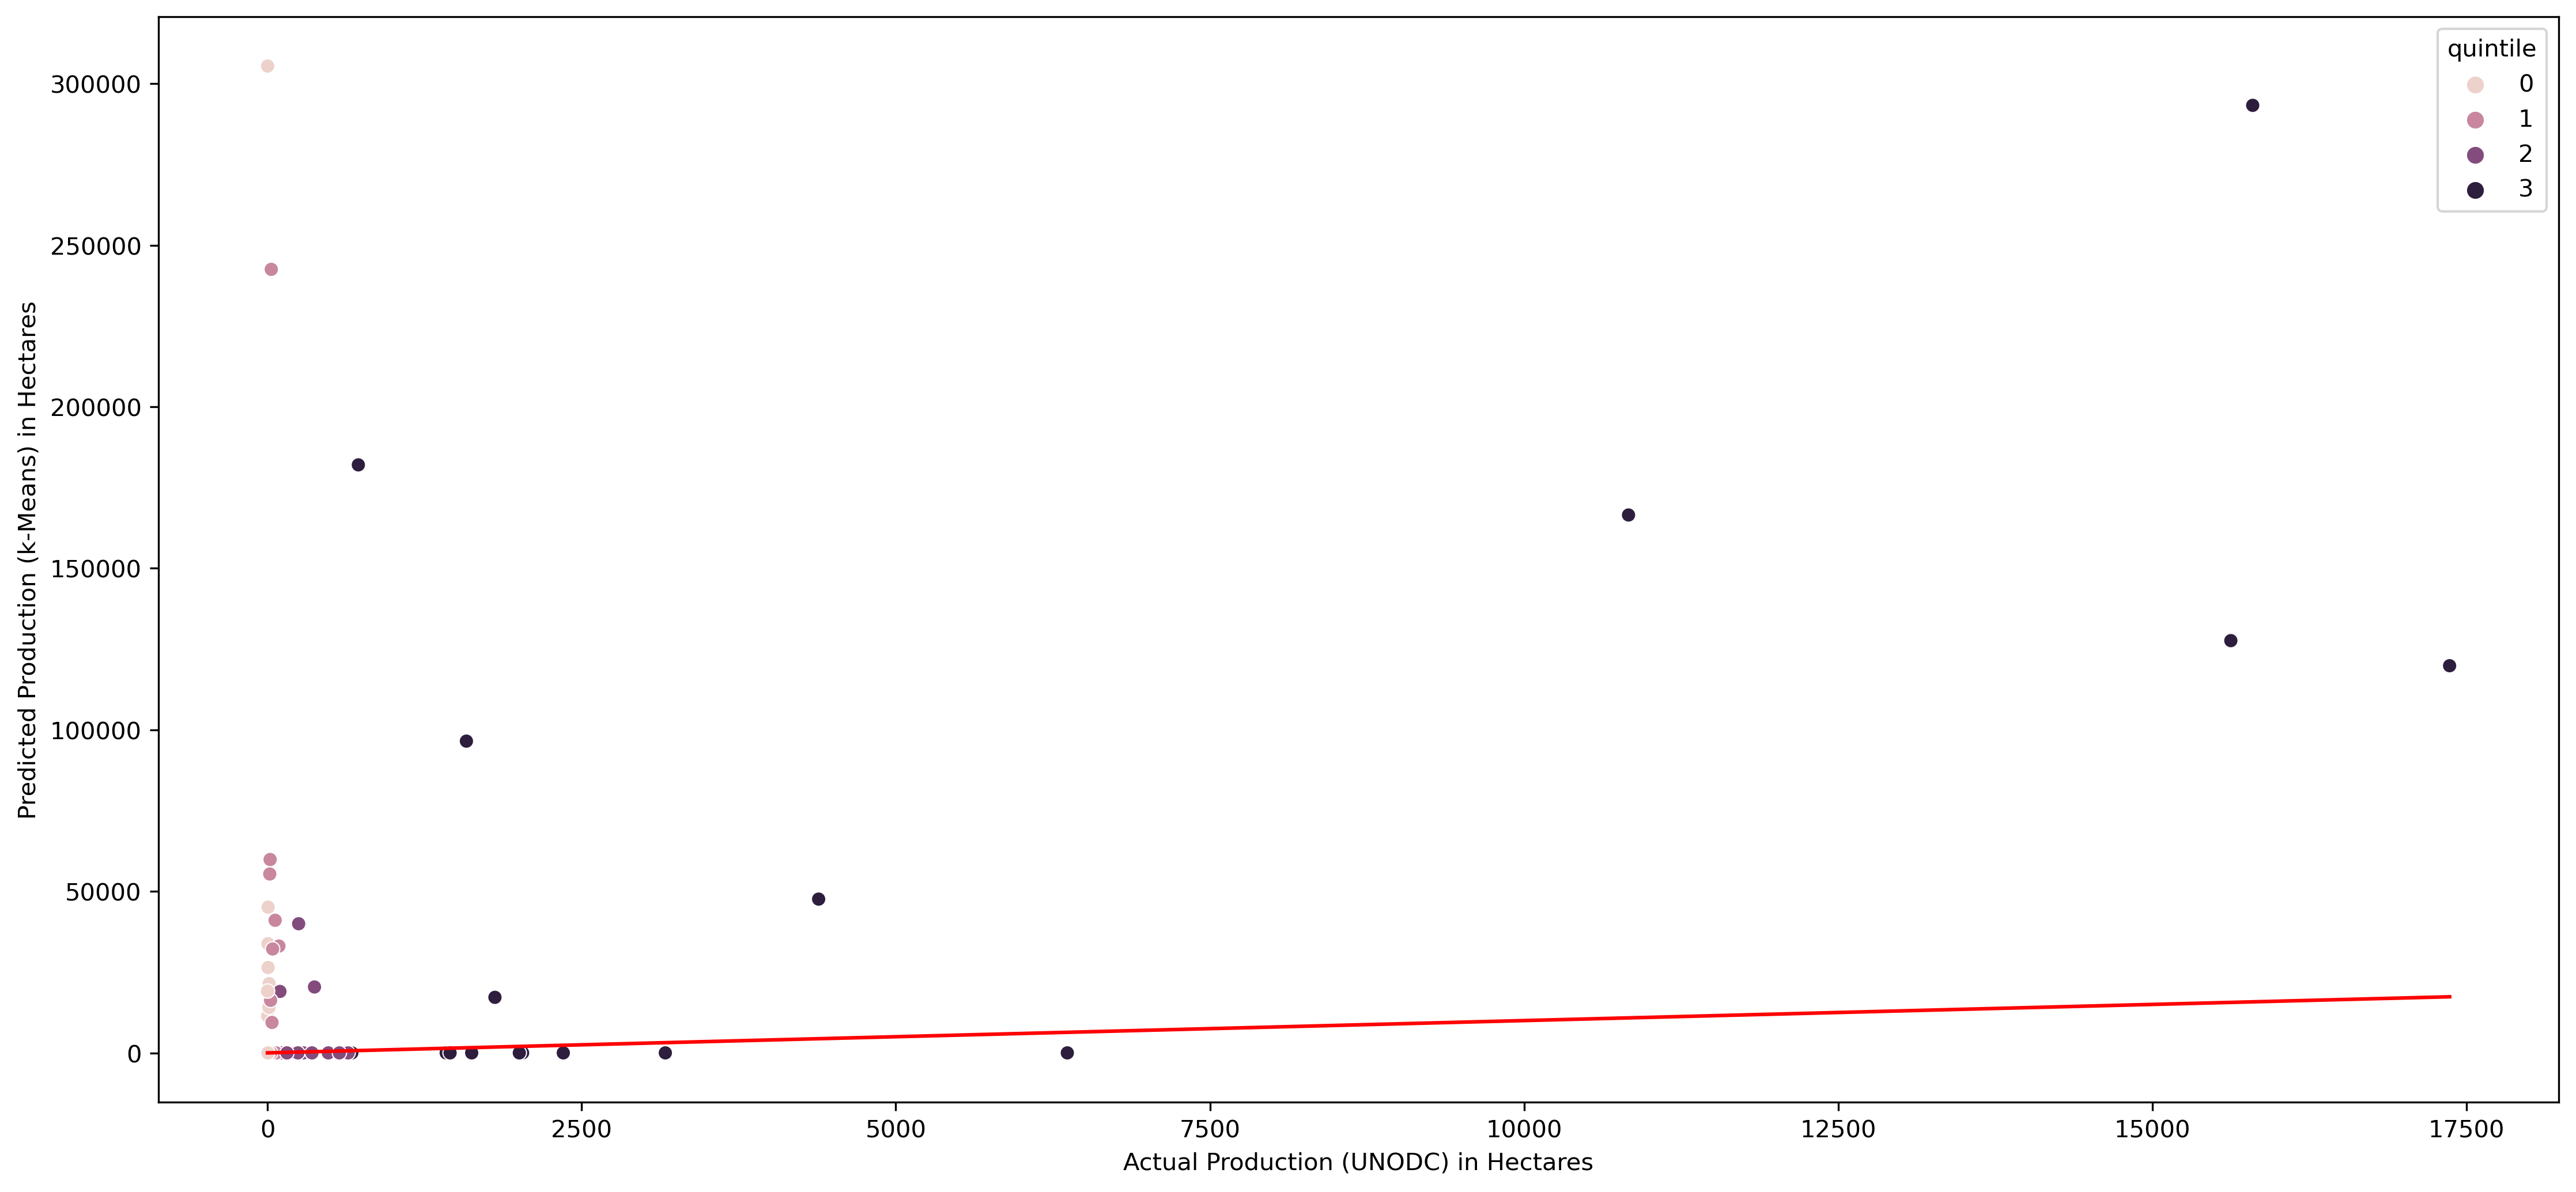

In [20]:
import seaborn as sns
fig, ax = plt.subplots(1,1,dpi=300, figsize=(15,7))
sns.scatterplot(x=(joined['actual_ha']), y=(joined['clustering_ha']), hue=joined['quintile'])

X_plot = np.linspace(0, np.max((joined['actual_ha'])), 100)
plt.plot(X_plot, X_plot, color='r')
ax.set_xlabel("Actual Production (UNODC) in Hectares")
ax.set_ylabel("Predicted Production (k-Means) in Hectares")
plt.tight_layout()
plt.show()

### Log plot

/home/arogya/.conda/envs/poppy-linux/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


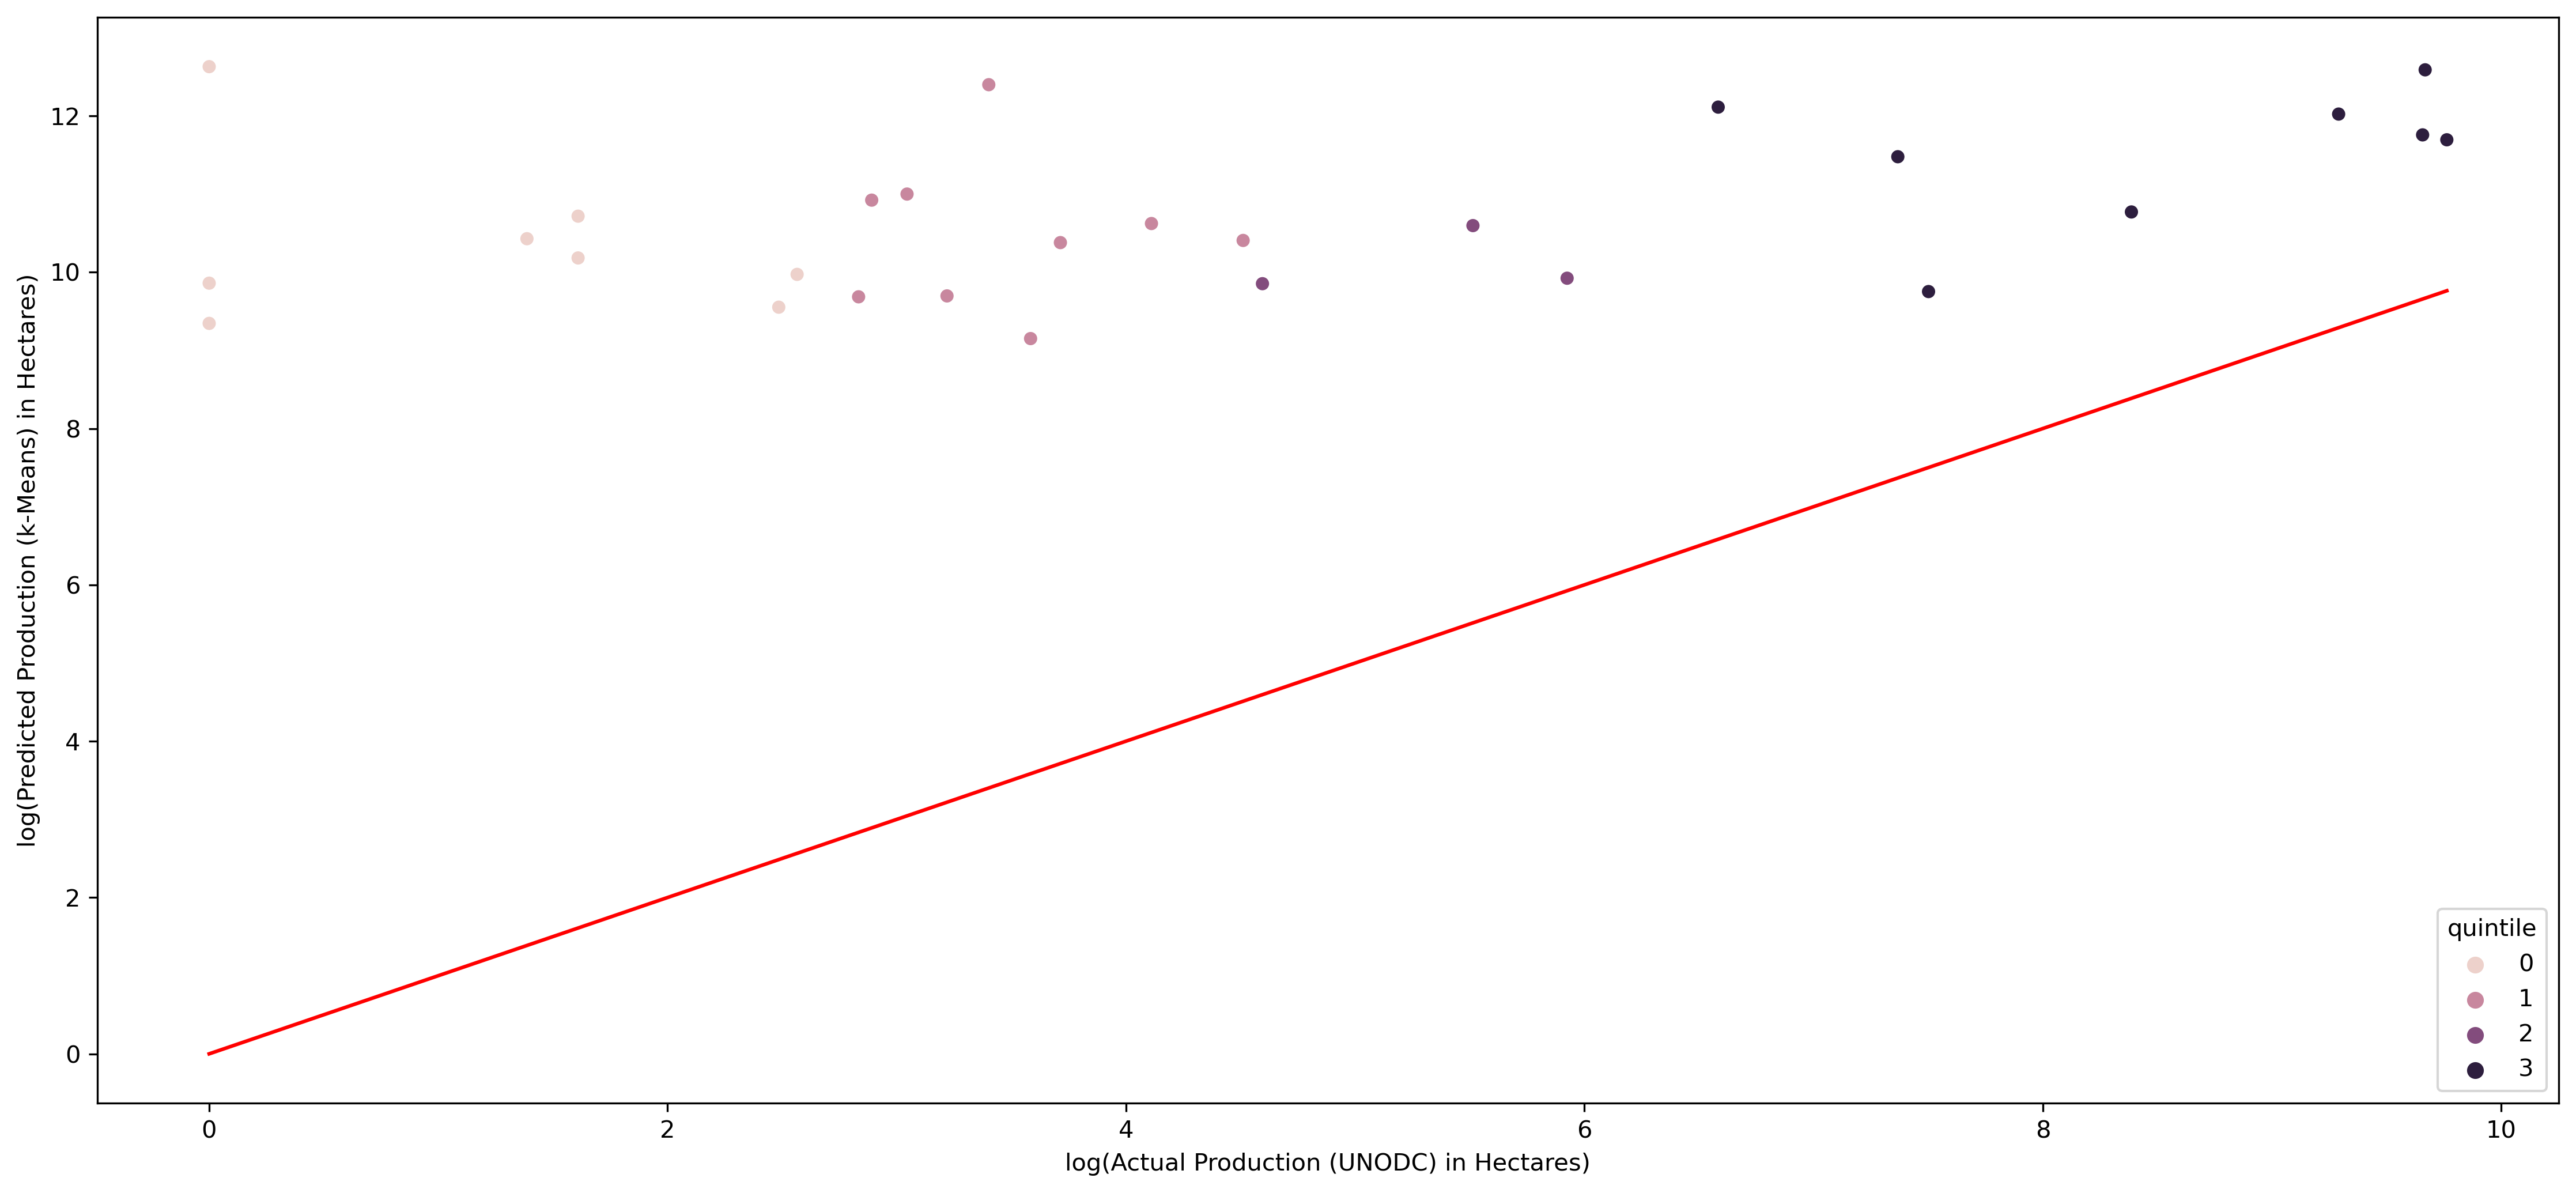

In [21]:
import seaborn as sns
fig, ax = plt.subplots(1,1,dpi=300, figsize=(15,7))
sns.scatterplot(x=np.log(joined['actual_ha']), y=np.log(joined['clustering_ha']), hue=joined['quintile'])

X_plot = np.linspace(0, np.max(np.log(joined['actual_ha'])), 100)
plt.plot(X_plot, X_plot, color='r')
ax.set_xlabel("log(Actual Production (UNODC) in Hectares)")
ax.set_ylabel("log(Predicted Production (k-Means) in Hectares)")
plt.tight_layout()
plt.show()